In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))

# ruta_monic = "C:\\Users\\monic\\ml_accident_bgta"
# sys.path.append(ruta_monic)

from src.config.setup import SetupConfig
from src.data_workflow.create_tables.create_tables import retrieve_all_table_data

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import folium

**Para acceder a los datos lo podemos hacer usando la función:**

`retrieve_all_table_data(<table_name>)`

Parámetros:
- table_name: nombre de la tabla

Para acceder al nombre de la tabla, hacerlo a tráves de la clase SetupConfig:
- `SetupConfig.TABLE_ACCIDENTE`
- `SetupConfig.TABLE_ACTOR_VIAL`
- `SetupConfig.TABLE_CAUSA`
- `SetupConfig.TABLE_LESIONADO`
- `SetupConfig.TABLE_MUERTO`
- `SetupConfig.TABLE_VEHICULO`
- `SetupConfig.TABLE_VIA`

# Lectura base de datos

In [2]:
LESIONADO = retrieve_all_table_data(SetupConfig.TABLE_LESIONADO)
print(f'El dataset tiene {LESIONADO.shape[0]} filas y {LESIONADO.shape[1]} columnas ')

MUERTO = retrieve_all_table_data(SetupConfig.TABLE_MUERTO)
print(f'El dataset tiene {MUERTO.shape[0]} filas y {MUERTO.shape[1]} columnas ')

ACCIDENTE = retrieve_all_table_data(SetupConfig.TABLE_ACCIDENTE)
print(f'El dataset tiene {ACCIDENTE.shape[0]} filas y {ACCIDENTE.shape[1]} columnas ')

VEHICULO = retrieve_all_table_data(SetupConfig.TABLE_VEHICULO)
print(f'El dataset tiene {VEHICULO.shape[0]} filas y {VEHICULO.shape[1]} columnas ')

ACTORVIAL = retrieve_all_table_data(SetupConfig.TABLE_ACTOR_VIAL)
print(f'El dataset tiene {ACTORVIAL.shape[0]} filas y {ACTORVIAL.shape[1]} columnas ')

CAUSA = retrieve_all_table_data(SetupConfig.TABLE_CAUSA)
print(f'El dataset tiene {CAUSA.shape[0]} filas y {CAUSA.shape[1]} columnas ')

VIA = retrieve_all_table_data(SetupConfig.TABLE_VIA)
print(f'El dataset tiene {VIA.shape[0]} filas y {VIA.shape[1]} columnas ')


El dataset tiene 250182 filas y 16 columnas 
El dataset tiene 8106 filas y 18 columnas 
El dataset tiene 473883 filas y 18 columnas 
El dataset tiene 1443037 filas y 9 columnas 
El dataset tiene 1679376 filas y 14 columnas 
El dataset tiene 683654 filas y 10 columnas 
El dataset tiene 483952 filas y 19 columnas 


# Descriptiva univariada

## Accidente

In [ ]:
ACCIDENTE.head()

C:\Users\santiago.higuitau_pr\AppData\Local\Temp\ipykernel_29760\3273355186.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
C:\Users\santiago.higuitau_pr\AppData\Local\Temp\ipykernel_29760\3273355186.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


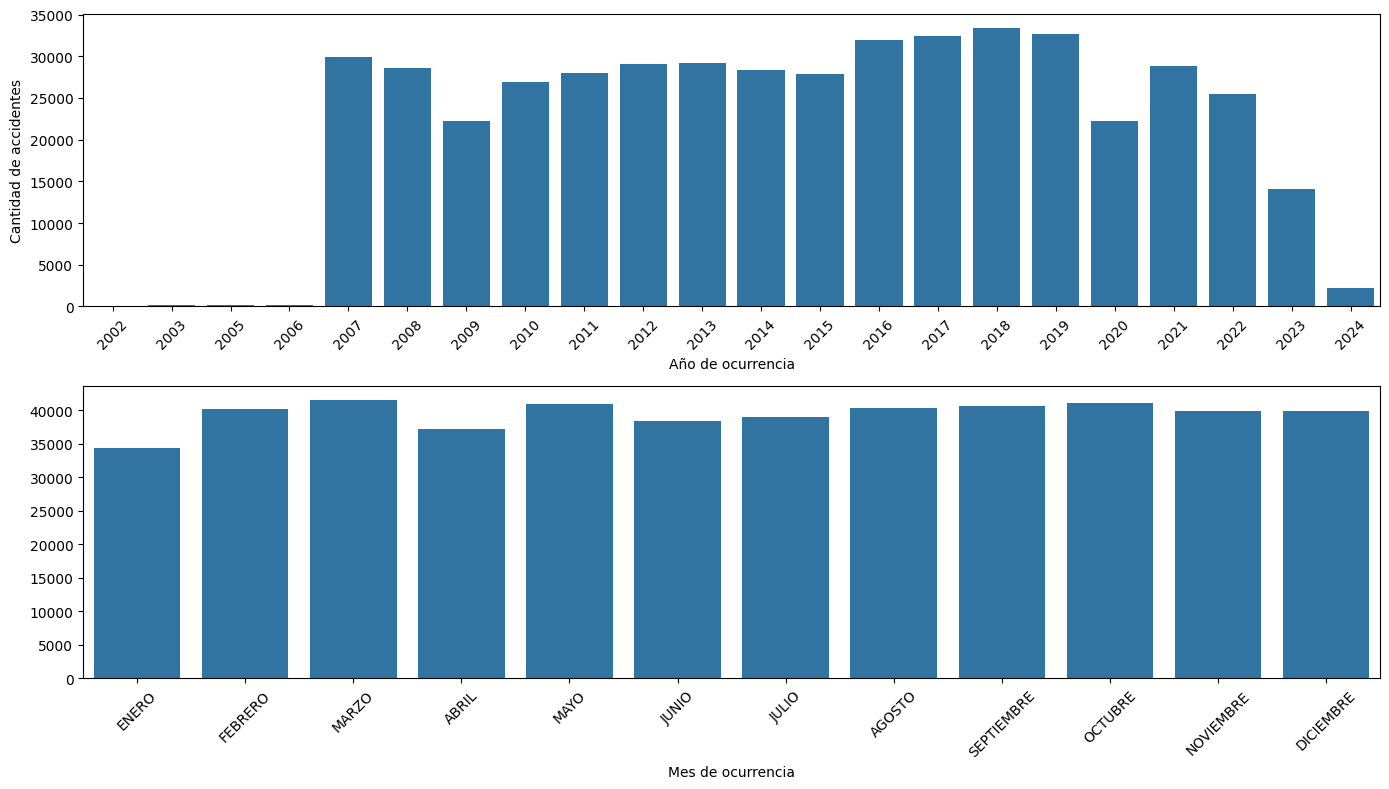

In [3]:
## NUMERO DE ACCIDENTES AÑO
tabla_year = ACCIDENTE.groupby(['ANO_OCURRENCIA_ACC']).size().reset_index(name="CONTEO")

## NUMERO DE ACCIDENTES MES
tabla_mes = ACCIDENTE.groupby(['MES_OCURRENCIA_ACC']).size().reset_index(name="CONTEO")
orden_meses = pd.DataFrame({"MES":["ENERO", "FEBRERO", "MARZO", "ABRIL", "MAYO", "JUNIO", "JULIO", "AGOSTO","SEPTIEMBRE", "OCTUBRE", "NOVIEMBRE", "DICIEMBRE"],
                            "MES_NUM": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

tabla_mes = pd.merge(tabla_mes, orden_meses, left_on="MES_OCURRENCIA_ACC", right_on="MES", how = "left")
tabla_mes = tabla_mes.sort_values(by='MES_NUM').reset_index(drop=True)



fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(14, 8))

# Gráficos de año
sns.barplot(x='ANO_OCURRENCIA_ACC', y='CONTEO', data=tabla_year, ax=ax1)
ax1.set_title('')
ax1.set_ylabel('Cantidad de accidentes')
ax1.set_xlabel('Año de ocurrencia')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

#Grafico mes
sns.barplot(x='MES_OCURRENCIA_ACC', y='CONTEO', data=tabla_mes, ax=ax2)
ax2.set_title('')
ax2.set_ylabel('')
ax2.set_xlabel('Mes de ocurrencia')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# Ajustar diseño
plt.tight_layout()
plt.show()

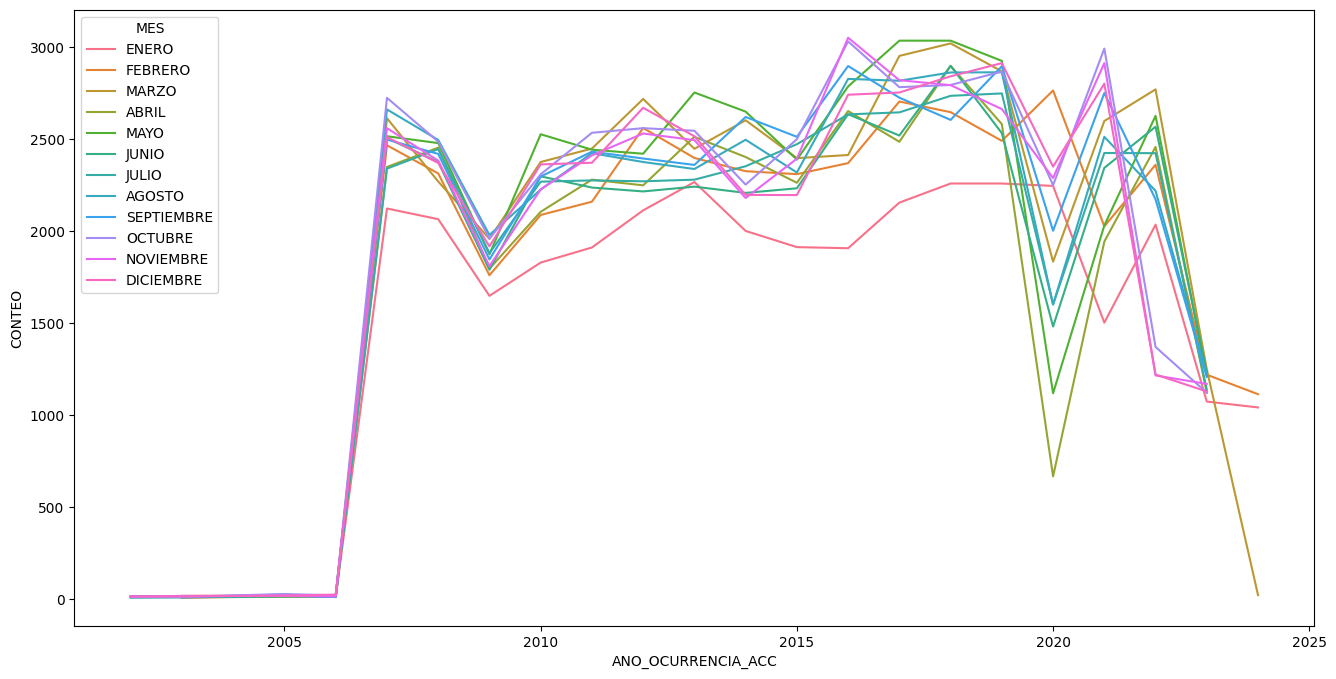

In [4]:
tabla_year_mes = ACCIDENTE.groupby(['ANO_OCURRENCIA_ACC', "MES_OCURRENCIA_ACC"]).size().reset_index(name="CONTEO")

tabla_year_mes = pd.merge(tabla_year_mes, orden_meses, left_on="MES_OCURRENCIA_ACC", right_on="MES", how = "left")

tabla_year_mes = tabla_year_mes.sort_values(by = ["MES_NUM", "ANO_OCURRENCIA_ACC"], ascending= [True, True])

# Graficar
plt.figure(figsize=(16, 8))
sns.lineplot(data=tabla_year_mes, x="ANO_OCURRENCIA_ACC", y="CONTEO", hue="MES")
# plt.tight_layout()
plt.show()

<Figure size 1800x600 with 0 Axes>

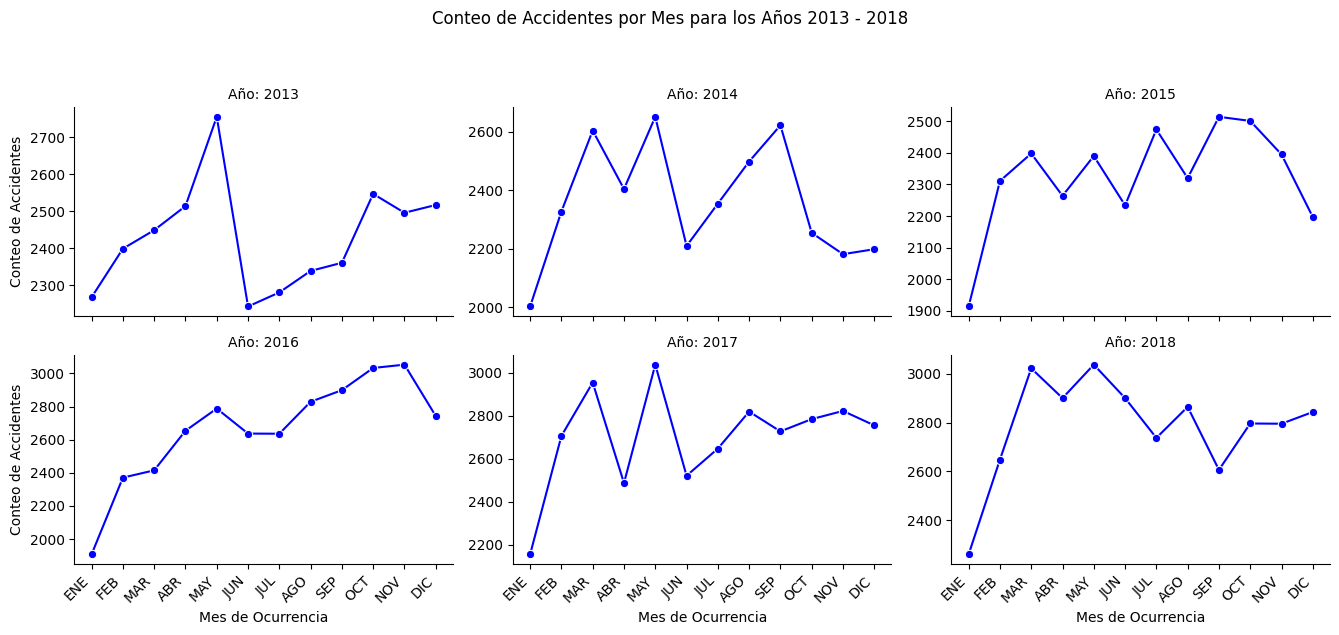

<Figure size 1800x600 with 0 Axes>

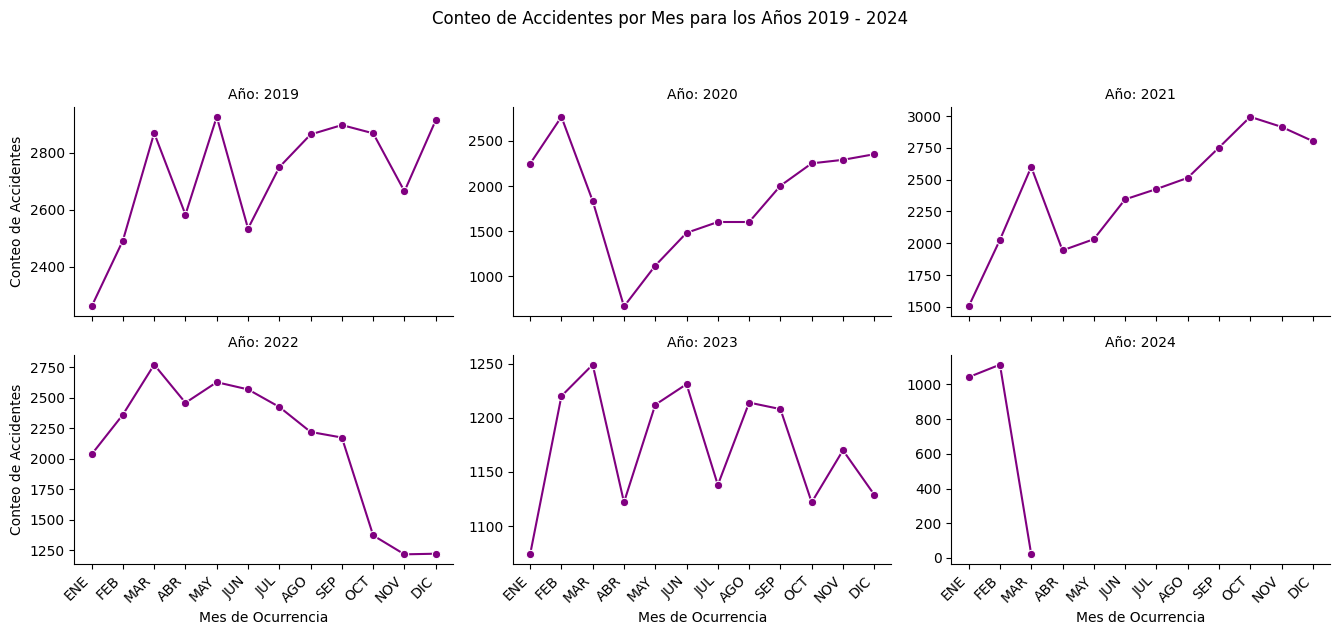

In [39]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorar los warnings
warnings.filterwarnings("ignore")

# Suponiendo que 'orden_meses' es un DataFrame que contiene los meses en el orden correcto

# Agrupar y ordenar los datos
tabla_year_mes = ACCIDENTE.groupby(['ANO_OCURRENCIA_ACC', 'MES_OCURRENCIA_ACC']).size().reset_index(name='CONTEO')
tabla_year_mes = pd.merge(tabla_year_mes, orden_meses, left_on='MES_OCURRENCIA_ACC', right_on='MES', how='left')
tabla_year_mes = tabla_year_mes.sort_values(by=['MES_NUM', 'ANO_OCURRENCIA_ACC'], ascending=[True, True])

# Filtrar los datos para los años deseados
tabla_year_mes = tabla_year_mes[(tabla_year_mes['ANO_OCURRENCIA_ACC'] >= 2013) & (tabla_year_mes['ANO_OCURRENCIA_ACC'] <= 2024)]

# Listar los años disponibles
years = sorted(tabla_year_mes['ANO_OCURRENCIA_ACC'].unique())

# Dividir los años en grupos
year_groups = [years[:6], years[6:]]

# Definir una lista de colores primarios
colors = ['blue', 'purple']

# Crear gráficos para cada grupo de años
for i, group in enumerate(year_groups):
    plt.figure(figsize=(18, 6))  # Ajustar el tamaño de la figura aquí (ancho, alto)
    g = sns.FacetGrid(tabla_year_mes[tabla_year_mes['ANO_OCURRENCIA_ACC'].isin(group)], col='ANO_OCURRENCIA_ACC', col_wrap=3, height=3, aspect=1.5, sharey=False, palette=[colors[i]])
    g.map(sns.lineplot, 'MES_OCURRENCIA_ACC', 'CONTEO', marker='o', color=colors[i])  # Usar el color del grupo correspondiente

    # Ajustar las etiquetas del eje x para las subtramas superiores
    for ax in g.axes.flat:
        ax.set_xticklabels(labels=orden_meses['ABREV'], rotation=45, ha='right')

    g.set_axis_labels('Mes de Ocurrencia', 'Conteo de Accidentes')
    g.set_titles(col_template='Año: {col_name}')
    g.fig.suptitle(f'Conteo de Accidentes por Mes para los Años {group[0]} - {group[-1]}', y=1.05)

    plt.tight_layout()
    plt.show()




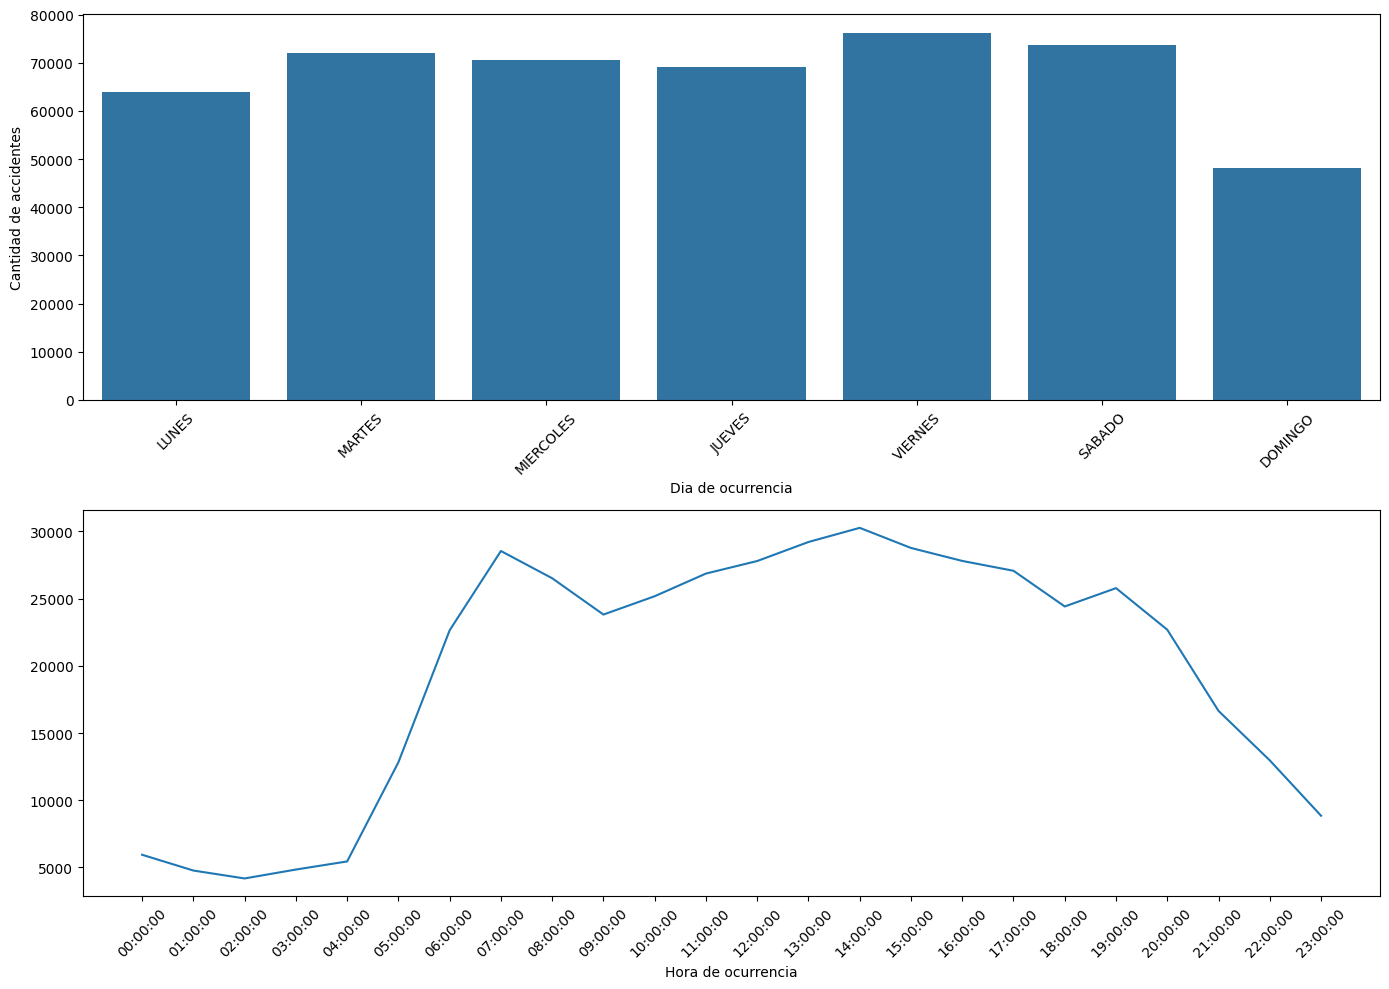

In [40]:
## NUMERO ACCIDENTES POR DIA
tabla_dia = ACCIDENTE.groupby(['DIA_OCURRENCIA_ACC']).size().reset_index(name="CONTEO")
orden_dias = pd.DataFrame({"DIA":["LUNES", "MARTES", "MIERCOLES", "JUEVES", "VIERNES", "SABADO", "DOMINGO"],
                            "DIA_NUM": [1, 2, 3, 4, 5, 6, 7]})

tabla_dia = pd.merge(tabla_dia, orden_dias, left_on="DIA_OCURRENCIA_ACC", right_on="DIA", how = "left")
tabla_dia = tabla_dia.sort_values(by='DIA_NUM').reset_index(drop=True)

# ## TABLA ACCIDENTE POR HORA
ACCIDENTE['HORA_OCURRENCIA_ACC_aux'] = pd.to_datetime(ACCIDENTE['HORA_OCURRENCIA_ACC']).dt.strftime('%H:00:00')
tabla_hora = ACCIDENTE.groupby(['HORA_OCURRENCIA_ACC_aux']).size().reset_index(name="CONTEO")

fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(14, 10))

#Grafico de dia
sns.barplot(x='DIA_OCURRENCIA_ACC', y='CONTEO', data=tabla_dia, ax=ax1)
ax1.set_title('')
ax1.set_ylabel('Cantidad de accidentes')
ax1.set_xlabel('Dia de ocurrencia')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Gráfico de línea
sns.lineplot(x='HORA_OCURRENCIA_ACC_aux', y='CONTEO', data=tabla_hora, ax=ax2)
ax2.set_title('')
ax2.set_ylabel('')
ax2.set_xlabel('Hora de ocurrencia')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


# Ajustar diseño
plt.tight_layout()
plt.show()

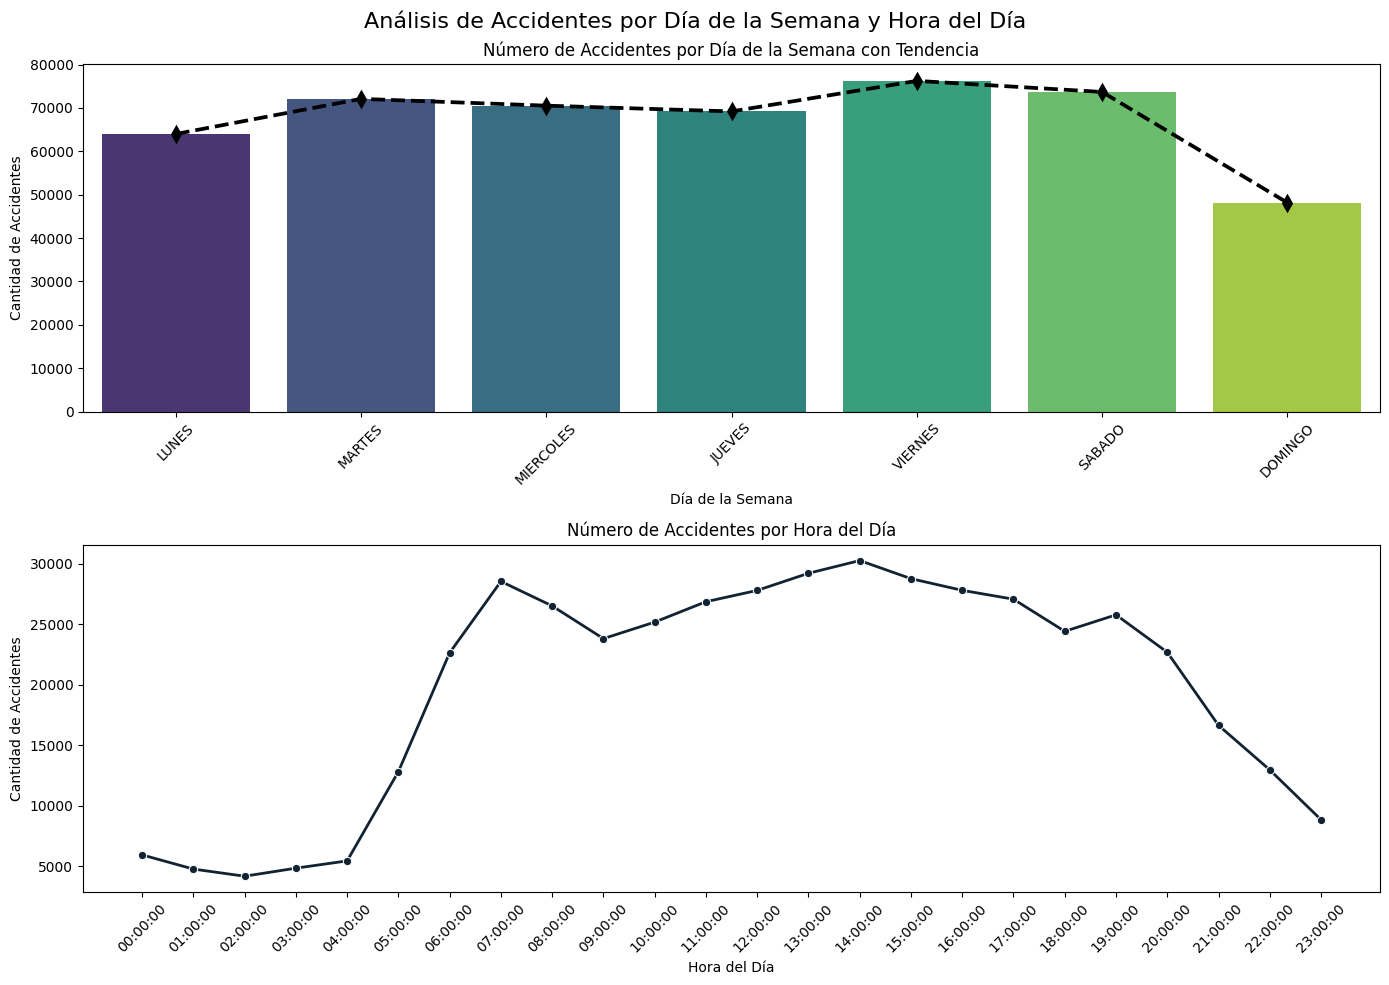

In [52]:
# Datos de ejemplo y orden de días
tabla_dia = ACCIDENTE.groupby(['DIA_OCURRENCIA_ACC']).size().reset_index(name="CONTEO")
orden_dias = pd.DataFrame({"DIA":["LUNES", "MARTES", "MIERCOLES", "JUEVES", "VIERNES", "SABADO", "DOMINGO"],
                            "DIA_NUM": [1, 2, 3, 4, 5, 6, 7]})
tabla_dia = pd.merge(tabla_dia, orden_dias, left_on="DIA_OCURRENCIA_ACC", right_on="DIA", how = "left")
tabla_dia = tabla_dia.sort_values(by='DIA_NUM').reset_index(drop=True)

# Agrupar por hora y formato de hora
ACCIDENTE['HORA_OCURRENCIA_ACC_aux'] = pd.to_datetime(ACCIDENTE['HORA_OCURRENCIA_ACC']).dt.strftime('%H:00:00')
tabla_hora = ACCIDENTE.groupby(['HORA_OCURRENCIA_ACC_aux']).size().reset_index(name="CONTEO")

# Configuración de la figura y subtramas
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Gráfico de barras para días de la semana con línea de puntos
sns.barplot(x='DIA_OCURRENCIA_ACC', y='CONTEO', data=tabla_dia, ax=ax1, palette='viridis')
sns.pointplot(x='DIA_OCURRENCIA_ACC', y='CONTEO', data=tabla_dia, ax=ax1, color='black', markers='d', linestyles='--')
ax1.set_title('Número de Accidentes por Día de la Semana con Tendencia')
ax1.set_ylabel('Cantidad de Accidentes')
ax1.set_xlabel('Día de la Semana')
ax1.set_xticklabels(tabla_dia['DIA'], rotation=45)

# Gráfico de dispersión (puntos) para horas del día
sns.scatterplot(x='HORA_OCURRENCIA_ACC_aux', y='CONTEO', data=tabla_hora, ax=ax2, color=(17/255, 35/255, 50/255), marker='o', label='_nolegend_')

# Gráfico de línea para horas del día
sns.lineplot(x='HORA_OCURRENCIA_ACC_aux', y='CONTEO', data=tabla_hora, ax=ax2, color=(17/255, 35/255, 50/255), marker='o', linestyle='-', linewidth=2)

ax2.set_title('Número de Accidentes por Hora del Día')
ax2.set_ylabel('Cantidad de Accidentes')
ax2.set_xlabel('Hora del Día')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# Título general para la figura
fig.suptitle('Análisis de Accidentes por Día de la Semana y Hora del Día', fontsize=16)

# Ajustar diseño general y mostrar
plt.tight_layout()
plt.show()

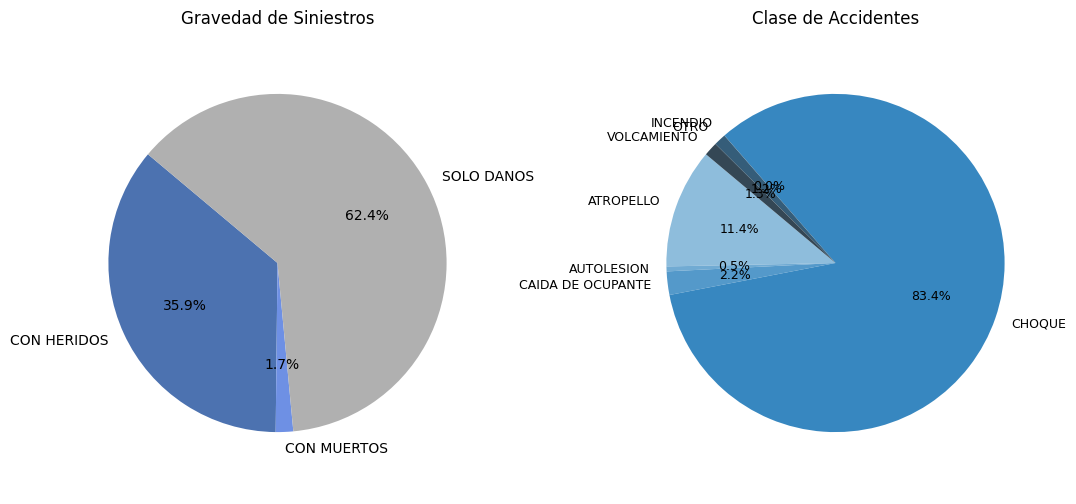

In [53]:
## GRAVEDAD y CLASE_ACC
tabla_gravedad = ACCIDENTE.groupby(["GRAVEDAD"]).size().reset_index(name="CONTEO")
tabla_claseacc = ACCIDENTE.groupby(["CLASE_ACC"]).size().reset_index(name="CONTEO")

paleta_gravedad = ["#4c72b0", "#6e90e4", "#b0b0b0"]
paleta_claseacc = sns.color_palette("Blues_d", len(tabla_claseacc))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.subplots_adjust(wspace=0.5) 

# Gráfico de pastel para gravedad
ax1.pie(tabla_gravedad["CONTEO"], labels=tabla_gravedad["GRAVEDAD"], autopct='%1.1f%%', startangle=140, colors=paleta_gravedad)
ax1.set_title('Gravedad de Siniestros')
ax1.axis('equal') 

# Gráfico de pastel para clase de accidente
ax2.pie(tabla_claseacc["CONTEO"], labels=tabla_claseacc["CLASE_ACC"], autopct='%1.1f%%', startangle=140, colors=paleta_claseacc, textprops={'fontsize': 9})
ax2.set_title('Clase de Accidentes')
ax2.axis('equal')  

# Mostrar los gráficos
plt.show()

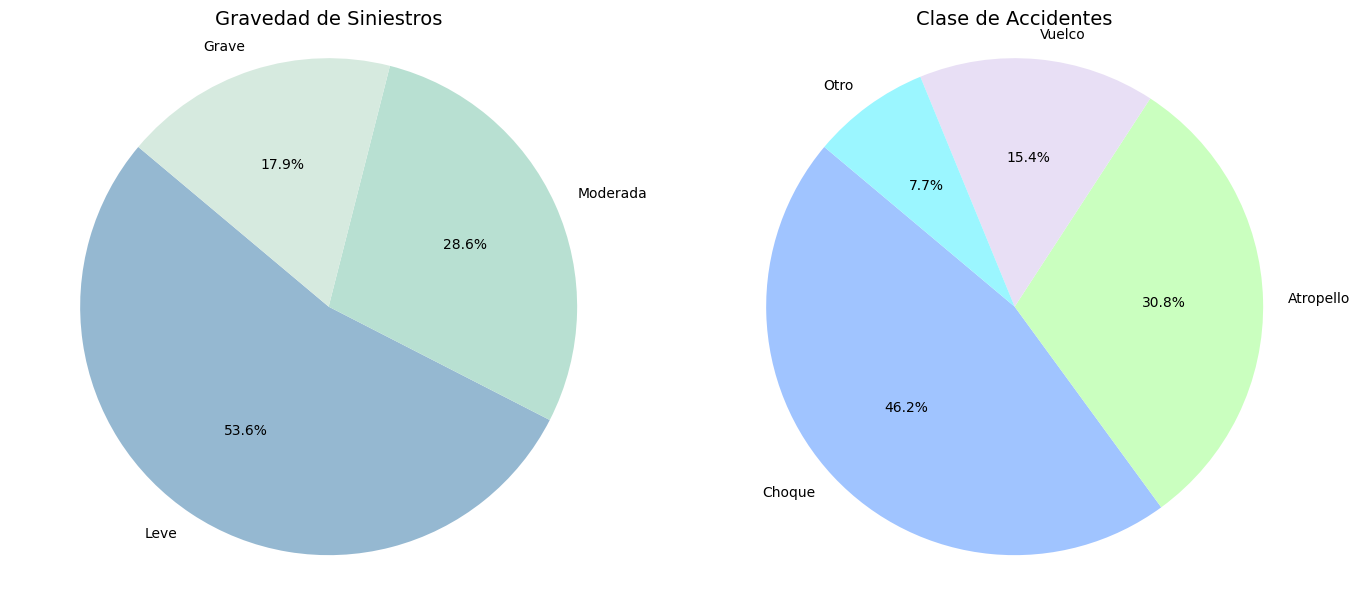

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de ejemplo
tabla_gravedad = pd.DataFrame({"GRAVEDAD": ["Leve", "Moderada", "Grave"], "CONTEO": [150, 80, 50]})
tabla_claseacc = pd.DataFrame({"CLASE_ACC": ["Choque", "Atropello", "Vuelco", "Otro"], "CONTEO": [60, 40, 20, 10]})

# Paleta de colores personalizada para gravedad de siniestros
paleta_gravedad = ["#95b8d1", "#b8e0d2", "#d6eadf"]

# Paleta de colores para clase de accidentes
paleta_claseacc = ["#a0c4ff", "#caffbf", "#e8dff5", "#9bf6ff"]



# Crear figura y ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # Dos subplots, uno al lado del otro

# Gráfico de pastel para gravedad de siniestros
ax1.pie(tabla_gravedad["CONTEO"], labels=tabla_gravedad["GRAVEDAD"], autopct='%1.1f%%', startangle=140, colors=paleta_gravedad)
ax1.set_title('Gravedad de Siniestros', fontsize=14)
ax1.axis('equal')  # Asigna el aspecto de un círculo

# Gráfico de pastel para clase de accidentes
wedges, texts, autotexts = ax2.pie(tabla_claseacc["CONTEO"], labels=tabla_claseacc["CLASE_ACC"], autopct='%1.1f%%', startangle=140, colors=paleta_claseacc, textprops={'fontsize': 10})

# Ajuste para sacar las categorías pequeñas
for text, autotext in zip(texts, autotexts):
    if float(autotext.get_text().strip('%')) < 5:
        autotext.set_visible(False)

ax2.set_title('Clase de Accidentes', fontsize=14)
ax2.axis('equal')  # Asigna el aspecto de un círculo

# Ajustes adicionales para mejorar la visualización
plt.tight_layout()  # Ajusta automáticamente la disposición de los subplots para evitar superposiciones

# Mostrar los gráficos
plt.show()


In [ ]:
## MAPA GRAVEDAD ACCIDENTES
import folium
from folium.plugins import HeatMap
import pandas as pd

tabla_georef = ACCIDENTE.groupby(['LATITUD', 'LONGITUD']).size().reset_index(name="CONTEO")
tabla_georef = tabla_georef.sort_values(by="CONTEO", ascending=False)

m = folium.Map(location=[tabla_georef['LATITUD'].mean(), tabla_georef['LONGITUD'].mean()], zoom_start=11)

# Convertir las coordenadas a una lista de listas
data = tabla_georef[['LATITUD', 'LONGITUD', 'CONTEO']].values.tolist()

gradient = {0.2: 'blue',  0.6: 'yellow',  1: 'red'}
# Crear el mapa de calor
HeatMap(data, radius=10, max_zoom=13, gradient=gradient).add_to(m)

# Guardar el mapa
m.save('mapa_accidentes_heatmap.html')

## Lesionado y Muerto

In [4]:
# Tratamientos
LESIONADO = LESIONADO.drop(["OBJECTID"], axis=1)
LESIONADO["ESTADO_ACCIDENTADO"] = "LESIONADO"

MUERTO = MUERTO.drop(["OBJECTID", "MUERTE_POSTERIOR", "FECHA_POSTERIOR_MUERTE"], axis=1)
MUERTO["ESTADO_ACCIDENTADO"] = "MUERTO"

ESTADO_ACCIDENTADO = pd.concat([LESIONADO, MUERTO], axis=0, ignore_index=True).sort_values(by="FORMULARIO")
ESTADO_ACCIDENTADO.head()

,CODIGO_ACCIDENTADO,FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,FECHA_HORA_ACC,DIRECCION,CLASE_ACC,LOCALIDAD,CODIGO_VEHICULO,CONDICION,GENERO,EDAD,ESTADO_ACCIDENTADO
51392,319457,20092200,2002-05-18 19:00:00,15:45:00,2002,MAYO,DOMINGO,2002-05-19 10:45:00,KR 10-9 30,ATROPELLO,CANDELARIA,NaN,PEATON,SIN INFORMACION,24.0,LESIONADO
51393,319458,20092200,2002-05-18 19:00:00,15:45:00,2002,MAYO,DOMINGO,2002-05-19 10:45:00,KR 10-9 30,ATROPELLO,CANDELARIA,NaN,PEATON,SIN INFORMACION,21.0,LESIONADO
51394,319562,20127000,2002-05-16 19:00:00,13:30:00,2002,MAYO,VIERNES,2002-05-17 08:30:00,KR 24-33 S 57,CAIDA DE OCUPANTE,RAFAEL URIBE URIBE,1.0,PASAJERO,SIN INFORMACION,18.0,LESIONADO
51416,319866,20222900,2002-05-21 19:00:00,18:45:00,2002,MAYO,MIERCOLES,2002-05-22 13:45:00,KR 9-85 32,ATROPELLO,CHAPINERO,NaN,PEATON,SIN INFORMACION,8.0,LESIONADO
51435,507170,20280100,2002-05-26 19:00:00,12:00:00,2002,MAYO,LUNES,2002-05-27 07:00:00,KR 10-16 37,OTRO,SANTA FE,1.0,CONDUCTOR,MASCULINO,21.0,LESIONADO


In [ ]:
ESTADO_ACCIDENTADO.groupby(["ESTADO_ACCIDENTADO","CONDICION"], dropna=False).size()

In [ ]:
ESTADO_ACCIDENTADO.groupby(["ESTADO_ACCIDENTADO","CLASE_ACC"], dropna=False).size()


## Actor Vial

In [3]:
ACTORVIAL.head(5)

,OBJECTID,FORMULARIO,CODIGO_ACCIDENTADO,CODIGO_VICTIMA,CODIGO_VEHICULO,CONDICION,ESTADO,MUERTE_POSTERIOR,FECHA_POSTERIOR_MUERTE,GENERO,FECHA_NACIMIENTO,EDAD,CODIGO,CONDICION_VEHICULO
0,1,A001395442,12806435,4,2.0,PASAJERO,HERIDO,N,1975-01-01 01:00:00,MASCULINO,2006-12-29 14:00:00,15.0,10566396-2,PASAJERO
1,2,A001395442,12806433,3,2.0,PASAJERO,HERIDO,N,1975-01-01 01:00:00,MASCULINO,2005-12-09 14:00:00,16.0,10566396-2,PASAJERO
2,3,A001395442,12806431,2,2.0,PASAJERO,HERIDO,N,1975-01-01 01:00:00,FEMENINO,1967-09-29 14:00:00,54.0,10566396-2,PASAJERO
3,4,A001395442,12806430,1,2.0,CONDUCTOR,HERIDO,N,1975-01-01 01:00:00,MASCULINO,1987-03-15 02:00:00,35.0,10566396-2,CONDUCTOR
4,5,A001395863,12806432,0,1.0,CONDUCTOR,HERIDO,N,1975-01-01 01:00:00,MASCULINO,1971-04-20 02:00:00,50.0,10566397-1,CONDUCTOR


In [10]:
tabla_resumen_actor_vial_accidentado = ACTORVIAL.groupby(["ESTADO",'CONDICION', "CODIGO_ACCIDENTADO"], dropna=False).size().reset_index(name = "CONTEO")
tabla_resumen_actor_vial_accidentado.drop(columns="CONTEO", inplace=True)

In [20]:
tabla_resumen_actor_vial_accidentado.groupby(["CONDICION", "ESTADO"], dropna=False)['CODIGO_ACCIDENTADO'].count().unstack()

ESTADO,HERIDO,ILESO,MUERTO,NaN
CONDICION,,,,
CICLISTA,35936.0,5637.0,1417.0,47.0
CONDUCTOR,38651.0,1186885.0,581.0,4761.0
MOTOCICLISTA,105166.0,63725.0,2660.0,248.0
PASAJERO,119396.0,128.0,1483.0,51.0
PEATON,103692.0,110.0,6086.0,65.0
SIN INFORMACION,135.0,NaN,5.0,482.0
NaN,1.0,25.0,NaN,0.0


In [21]:
ACTORVIAL.groupby(["CONDICION", "ESTADO"], dropna=False)['CODIGO_ACCIDENTADO'].count().unstack()

ESTADO,HERIDO,ILESO,MUERTO,NaN
CONDICION,,,,
CICLISTA,35936.0,5637.0,1417.0,47.0
CONDUCTOR,38651.0,1186885.0,581.0,4761.0
MOTOCICLISTA,105166.0,63725.0,2660.0,248.0
PASAJERO,119396.0,128.0,1483.0,51.0
PEATON,103692.0,110.0,6086.0,65.0
SIN INFORMACION,135.0,NaN,5.0,482.0
NaN,1.0,25.0,NaN,0.0


In [6]:
muerto_actor_vial = ACTORVIAL[ACTORVIAL["ESTADO"] == "MUERTO"]
muerto_actor_vial.head()

,OBJECTID,FORMULARIO,CODIGO_ACCIDENTADO,CODIGO_VICTIMA,CODIGO_VEHICULO,CONDICION,ESTADO,MUERTE_POSTERIOR,FECHA_POSTERIOR_MUERTE,GENERO,FECHA_NACIMIENTO,EDAD,CODIGO,CONDICION_VEHICULO
199,176963,834642400,18920,1,NaN,PEATON,MUERTO,S,2008-05-02 19:00:00,MASCULINO,1899-12-31 19:04:00,NaN,10498-,PEATON
223,221,A001446730,12806662,0,1.0,MOTOCICLISTA,MUERTO,S,2022-03-28 19:00:00,MASCULINO,1986-02-10 02:00:00,36.0,10566499-1,MOTOCICLISTA
328,324,A001395879,12806777,0,1.0,MOTOCICLISTA,MUERTO,N,1975-01-01 01:00:00,MASCULINO,1997-08-20 02:00:00,24.0,10566552-1,MOTOCICLISTA
399,185495,1002201,300560,1,NaN,PEATON,MUERTO,None,1975-01-01 01:00:00,MASCULINO,1899-12-31 19:04:00,NaN,51721-,PEATON
432,426,A001446872,12806885,1,2.0,MOTOCICLISTA,MUERTO,N,1975-01-01 01:00:00,MASCULINO,1981-04-15 02:00:00,40.0,10566603-2,MOTOCICLISTA


In [7]:
print(muerto_actor_vial.shape[0], sum(muerto_actor_vial["CODIGO_ACCIDENTADO"].isin(MUERTO["CODIGO_ACCIDENTADO"])))


12232 8105


# Seleccion variables para cruce semana 6

## Propuesta 1: Partir desde la union lesionado y muerto

### Union Lesionado y Muerto

Se une la tabla lesionado y muerto, identificando con variable indicadora, si fue lesionado o muerto <br>
Se omite 37 registros que no tienen "CLASE_ACC" <br>
Se omite 1 registro que no tiene "CONDICION" <br>
Se omite 64399 registros que no tiene codigo vehiculo <br>		
Cant data inicial: 258288, Cant data final = 193862. Prueba inicial 75% de los datos iniciales. <br>


In [ ]:
LESIONADO.head()

In [ ]:
LESIONADO = LESIONADO.drop(["OBJECTID"], axis=1)
LESIONADO["ESTADO_ACCIDENTADO"] = "LESIONADO"

MUERTO = MUERTO.drop(["OBJECTID", "MUERTE_POSTERIOR", "FECHA_POSTERIOR_MUERTE"], axis=1)
MUERTO["ESTADO_ACCIDENTADO"] = "MUERTO"

ESTADO_ACCIDENTADO = pd.concat([LESIONADO, MUERTO], axis=0, ignore_index=True).sort_values(by="FORMULARIO")
print(ESTADO_ACCIDENTADO.shape, 
      "\n NA CLASE_ACC", sum(ESTADO_ACCIDENTADO["CLASE_ACC"].isna()),
      "\n NA CONDICION", sum(ESTADO_ACCIDENTADO["CONDICION"].isna()), 
      "\n NA CODIGO_VEHICULO", sum(ESTADO_ACCIDENTADO["CODIGO_VEHICULO"].isna())
      )
ESTADO_ACCIDENTADO = ESTADO_ACCIDENTADO[~ESTADO_ACCIDENTADO["CLASE_ACC"].isna()]
ESTADO_ACCIDENTADO = ESTADO_ACCIDENTADO[~ESTADO_ACCIDENTADO["CONDICION"].isna()]
ESTADO_ACCIDENTADO = ESTADO_ACCIDENTADO[~ESTADO_ACCIDENTADO["CODIGO_VEHICULO"].isna()]
ESTADO_ACCIDENTADO["CODIGO_VEHICULO"] = ESTADO_ACCIDENTADO["CODIGO_VEHICULO"].astype("Int64")

print(ESTADO_ACCIDENTADO.shape)

## Propuesta 2: Partir desde actor vial

## Actor vial

In [ ]:
ACTORVIAL.head()

In [ ]:
ACTORVIAL.info()

In [ ]:
ACTORVIAL["CODIGO_VEHICULO"] = ACTORVIAL["CODIGO_VEHICULO"].astype("Int64")

## Accidente
Usado para llevar a la tabla anterior (union lesionado muerto) el codigo del accidente para construir el codigo

In [ ]:
ACCIDENTE.head()

In [ ]:
ACCIDENTE['CODIGO_ACCIDENTE'] = ACCIDENTE['CODIGO_ACCIDENTE'].astype(str)
ACCIDENTE = ACCIDENTE[["FORMULARIO", "CODIGO_ACCIDENTE"]]

## Vehiculo

El codigo de vehiculo no asocia un tipo de vehiculo único. <br>
En dos formularios 1 puede ser automovil y en otro 1 puede ser volqueta.
Usado para identificar la clase de vehiculo implicado en el accidente por Codigo


In [ ]:
VEHICULO["CODIGO_VEHICULO"] = VEHICULO["CODIGO_VEHICULO"].astype("Int64").astype("str")
VEHICULO = VEHICULO[["CODIGO", "CLASE", "SERVICIO"]]

## Causa
Se excluye los registros que no tienen causa del accidente <br>
Se concatena las diferentes causas en un codigo, para que quede unico el codigo y llevarle la causa al vehiculo culpable

In [ ]:
CAUSA.head()

In [ ]:
AUX = CAUSA.groupby(["CODIGO_AC_VH", "NOMBRE"]).size().reset_index()
AUX["CANT_FRACCIONES"] = AUX.groupby("CODIGO_AC_VH")[0].transform("size")
CAUSA = AUX.groupby(["CODIGO_AC_VH"]).agg({
    "NOMBRE": lambda x: ', '.join(x.dropna()),
    "CANT_FRACCIONES": 'first'}).reset_index()  # Usar 'first' para obtener el valor único de "CANT_FRACCIONES"
CAUSA.rename(columns={"CODIGO_AC_VH": "CODIGO"}, inplace=True)

In [ ]:
CAUSA

In [ ]:
CAUSA.head()

## Via
Se omitn las variables en NA <br>
Se concatenen las posibles niveles de cada variable, para llevarlo unico 

In [ ]:
VIA.head()

In [ ]:
VIA = VIA.groupby(["FORMULARIO"]).agg({
    "MATERIAL": lambda x: ', '.join(x.dropna()),
    "CONDICIONES": lambda x: ', '.join(x.dropna()),
    'SEMAFORO': lambda x: ', '.join(x.dropna()),
    'ESTADO': lambda x: ', '.join(x.dropna()),  # Concatenar valores de "Estado" y eliminar NaN
    'UTILIZACION': lambda x: ', '.join(x.dropna())  # Concatenar valores de "Utilizacion" y eliminar NaN
}).reset_index()

## Construccion sabana

In [ ]:
print(ESTADO_ACCIDENTADO.shape)

#Primer cruce
DF_ALL = pd.merge(ESTADO_ACCIDENTADO, ACCIDENTE, on = "FORMULARIO", how="left")
DF_ALL["CODIGO"] = DF_ALL["CODIGO_ACCIDENTE"]+"-"+ DF_ALL["CODIGO_VEHICULO"].astype("str")
print(DF_ALL.shape)

#Segundo cruce
DF_ALL = pd.merge(DF_ALL, VEHICULO, on = "CODIGO", how = "left")
print(DF_ALL.shape)

#Tercer cruce
DF_ALL = pd.merge(DF_ALL, CAUSA, on = "CODIGO", how = "left")
print(DF_ALL.shape)

#Cuarto cruce
DF_ALL = pd.merge(DF_ALL, VIA, on = "FORMULARIO", how = "left")
print(DF_ALL.shape)

In [ ]:
DF_ALL.head()